<a href="https://colab.research.google.com/github/Rosalie324/Budgect_Prediction-/blob/main/Budget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -N https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv (download data)


!pip install -q git+https://github.com/tensorflow/docs


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `wget -N https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv (download data)'
  Preparing metadata (setup.py) ... done


In [6]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling




In [22]:
df = pd.read_csv('/content/Rosyy.csv', sep=';', encoding='ISO-8859-1')
print(df.head())

     Year  Season  Average Temperature °C  Humidity (%) Health Issue  \
0  2020.0  Winter                     5.0          70.0          Flu   
1  2020.0  Spring                    15.0          55.0    Allergies   
2  2020.0  Summer                    25.0          60.0   Heatstroke   
3  2020.0    Fall                    10.0          65.0         cold   
4  2021.0  Winter                     4.0          75.0          Flu   

   Number of Cases Treatment Cost (USSD) Region  
0           1500.0                20 000  North  
1           1000.0                15 000  North  
2            500.0                10 000  North  
3           1200.0                18 000  North  
4           1800.0                22 000  North  


In [23]:
# Clean the "Treatment Cost (USSD)" column by removing spaces and commas
df['Treatment Cost (USSD)'] = df['Treatment Cost (USSD)'].replace({' ': '', ',': ''}, regex=True).astype(float)

In [24]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Season', 'Health Issue', 'Region'], drop_first=True)

In [25]:
# Check for missing values
print(df.isnull().sum())

Year                       3
Average Temperature °C     3
Humidity (%)               3
Number of Cases            3
Treatment Cost (USSD)      3
Season_Spring              0
Season_Summer              0
Season_Winter              0
Health Issue_Flu           0
Health Issue_Heatstroke    0
Health Issue_cold          0
dtype: int64


In [26]:
# Fill or drop missing values (if any)
df = df.dropna()  # Drop rows with missing values (you could also use fillna() if needed)

# 2. Splitting the Data into Train and Test Sets
We'll use train_test_split from sklearn to split the data into training and testing sets.

In [27]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df.drop('Treatment Cost (USSD)', axis=1)  # All columns except 'Treatment Cost (USSD)'
y = df['Treatment Cost (USSD)']  # The target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Regression Model
Let's use Random Forest Regressor as an example. You can choose another model like Linear Regression or XGBoost.

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 4. Evaluate the Model
After training the model, we will evaluate it using Mean Absolute Error (MAE) and R² score:

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 653.75
Mean Squared Error: 585056.25
R² Score: 0.9198209850107066


# 5. Make Predictions on New Data
Once the model is trained, you can use it to predict the treatment cost for new data.
To resolve this issue, you need to ensure that:

The new data you pass to the model for prediction has the same columns (with the same names and order) as the data that was used to train the model.
Any missing columns in the new data (from the one-hot encoding process) should be created and set to zero.
Here’s how to fix

# Step-by-Step
1. Get the Columns from the Training Data
Before making predictions on new data, we need to ensure that the new data has the same columns as the training data, including all the one-hot encoded columns.


In [34]:
train_columns = X_train.columns

2. Ensure New Data Matches Training Data Columns
When you prepare your new data, you need to make sure that all the columns from the training data are present. If any columns are missing, you can add them and set their values to 0.

In [39]:
# Example new data (this is your original new data before encoding)
new_data = pd.DataFrame({
    'Year': [2022],
    'Average Temperature °C': [20],
    'Humidity (%)': [65],
    'Number of Cases': [1000],
    # The categorical variables need to be one-hot encoded to match the training set
    'Season_Spring': [1],  # Ensure this matches the encoding from training
    'Health Issue_Allergies': [1],
    'Region_North': [1]
})

# Ensure all columns from the training data are present in the new data
for column in train_columns:
    if column not in new_data.columns:
        new_data[column] = 0  # Add missing columns with 0s

# Make sure the columns are in the same order as the training data
new_data = new_data[train_columns]

# Now you can predict using the model
predicted_cost = model.predict(new_data)
print(f"Predicted Treatment Cost (USSD): {predicted_cost[0]}")

Predicted Treatment Cost (USSD): 16695.0


# Explanation:
Step 1: We get the columns from the training data (X_train.columns).
Step 2: For the new data, we check if all the columns from the training data are present. If any are missing, we add them with a value of 0 (indicating that they don’t apply to the current observation).
Step 3: We reorder the columns of the new data to match the order of columns used in the model during training.

# Additional Notes:
This solution assumes that you're using one-hot encoding for categorical features like Season, Health Issue, and Region. Ensure that the new data matches the one-hot encoded columns used during training.
It's important that the number of columns and their names in the new data exactly match those in the training data after one-hot encoding, or else the model will not be able to make predictions.

# Graphical Representation

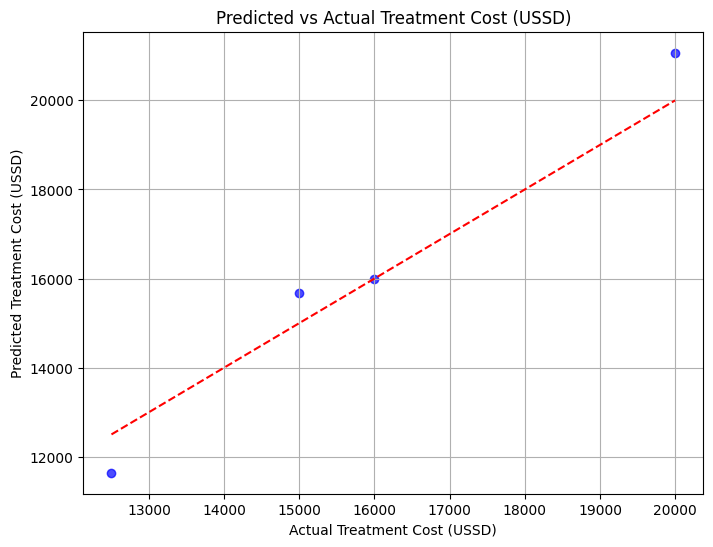

In [40]:
# Predict treatment cost on the test set
y_pred = model.predict(X_test)

# Scatter plot comparing actual vs predicted treatment costs
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title("Predicted vs Actual Treatment Cost (USSD)")
plt.xlabel("Actual Treatment Cost (USSD)")
plt.ylabel("Predicted Treatment Cost (USSD)")
plt.grid(True)
plt.show()

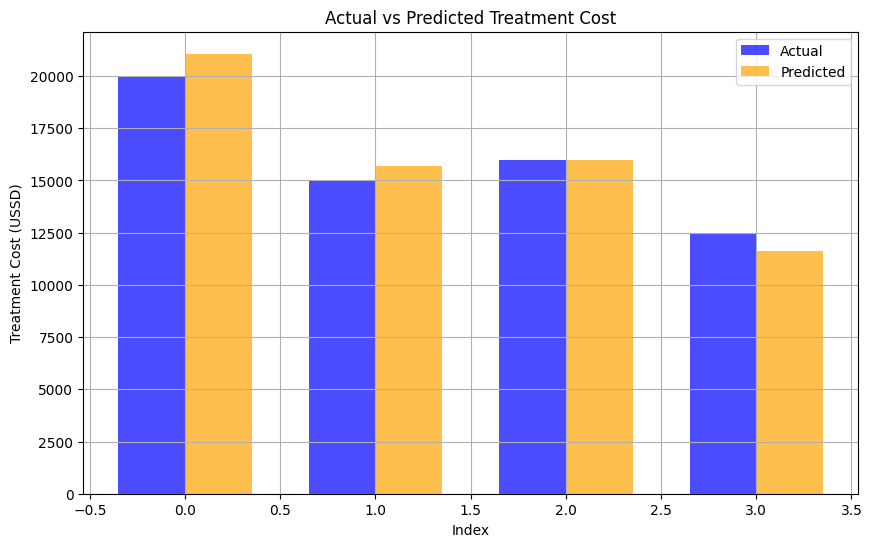

In [41]:
# Bar plot for Actual vs Predicted Treatment Cost
plt.figure(figsize=(10, 6))
x = np.arange(len(y_test))  # Indices for the x-axis
width = 0.35  # Width of bars

plt.bar(x - width/2, y_test, width, label='Actual', color='blue', alpha=0.7)
plt.bar(x + width/2, y_pred, width, label='Predicted', color='orange', alpha=0.7)

plt.xlabel('Index')
plt.ylabel('Treatment Cost (USSD)')
plt.title('Actual vs Predicted Treatment Cost')
plt.legend()
plt.grid(True)
plt.show()

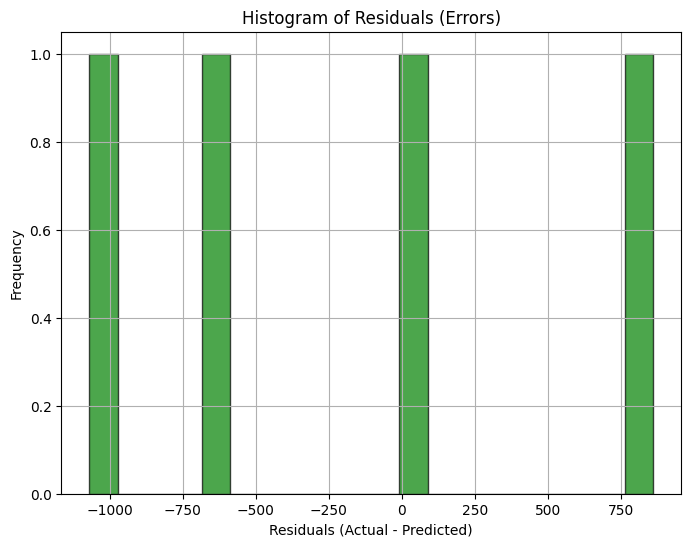

In [42]:
# Calculate residuals (errors)
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals (Errors)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

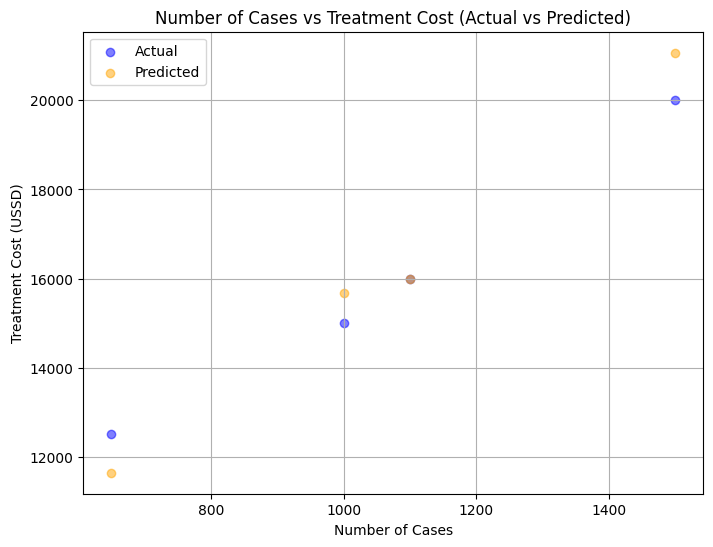

In [43]:
# Scatter plot showing the number of cases vs treatment cost (actual vs predicted)
plt.figure(figsize=(8, 6))

# Plot actual values
plt.scatter(X_test['Number of Cases'], y_test, color='blue', alpha=0.5, label='Actual')

# Plot predicted values
plt.scatter(X_test['Number of Cases'], y_pred, color='orange', alpha=0.5, label='Predicted')

plt.xlabel('Number of Cases')
plt.ylabel('Treatment Cost (USSD)')
plt.title('Number of Cases vs Treatment Cost (Actual vs Predicted)')
plt.legend()
plt.grid(True)
plt.show()

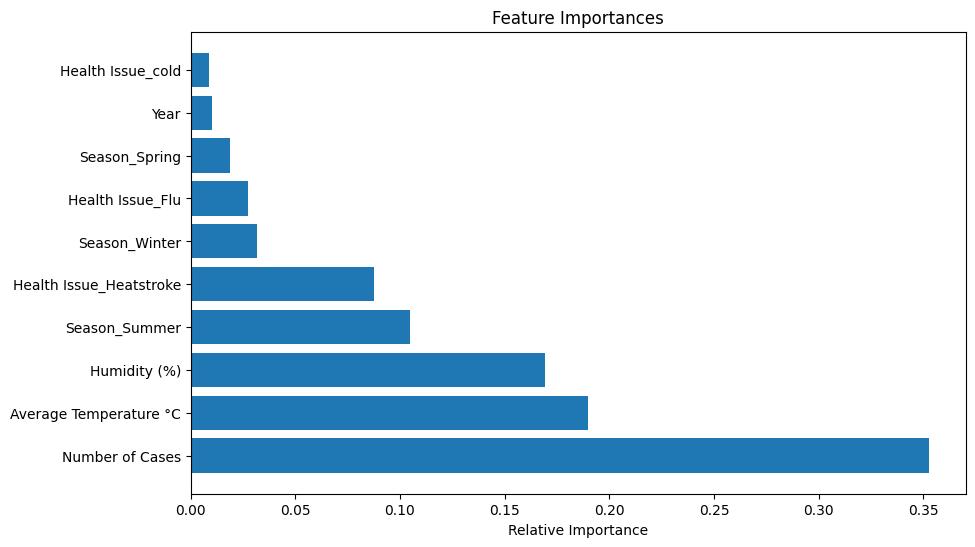

In [44]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()